In [ ]:
import pandas as pd


In [ ]:
# Load the dataset
df = pd.read_csv("HR-Employee-Attrition.csv")

# Display the first few rows to verify
display(df.head())

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
# converting Target variable into numeric
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Attrition']=encoder.fit_transform(df['Attrition'])

In [ ]:
# spliting into features and target variable
x=df.drop('Attrition',axis=1)
y=df['Attrition']


In [ ]:
binary_cols=[col for col in df.columns if df[col].dtype=='object' and df[col].nunique()==2]
multi_cat_cols=[col for col in df.columns if df[col].dtype=='object' and df[col].nunique()>2]
print(binary_cols)
print(multi_cat_cols)

['Gender', 'OverTime']
['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']


In [ ]:
for col in binary_cols:
  x[col]=encoder.fit_transform(x[col])

In [ ]:
x=pd.get_dummies(x,drop_first=True)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1176, 47)
(294, 47)
(1176,)
(294,)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
model=LogisticRegression(class_weight='balanced')
model.fit(x_train,y_train)


LogisticRegression(class_weight='balanced')

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7414965986394558
[[189  58]
 [ 18  29]]
              precision    recall  f1-score   support

           0       0.91      0.77      0.83       247
           1       0.33      0.62      0.43        47

    accuracy                           0.74       294
   macro avg       0.62      0.69      0.63       294
weighted avg       0.82      0.74      0.77       294



In [24]:
# Step 1: Import Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Step 2: Train the model
rf = RandomForestClassifier(class_weight="balanced", random_state=42)
rf.fit(x_train, y_train)

# Step 3: Predictions
y_pred_rf = rf.predict(x_test)

# Step 4: Evaluation
print(" Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\n Classification Report:\n", classification_report(y_test, y_pred_rf))

# Step 5: ROC-AUC Score
y_pred_prob = rf.predict_proba(x_test)[:,1]
print(" ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))

 Accuracy: 0.8435374149659864

 Confusion Matrix:
 [[244   3]
 [ 43   4]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.91       247
           1       0.57      0.09      0.15        47

    accuracy                           0.84       294
   macro avg       0.71      0.54      0.53       294
weighted avg       0.81      0.84      0.79       294

 ROC-AUC Score: 0.7503230252390386


In [25]:
from sklearn.metrics import roc_auc_score, f1_score


print("Logistic Regression ROC-AUC:", roc_auc_score(y_test, y_pred))
print("Logistic Regression F1-score:", f1_score(y_test, y_pred))

print("Random Forest ROC-AUC:", roc_auc_score(y_test, y_pred_rf))
print("Random Forest F1-score:", f1_score(y_test, y_pred_rf))

Logistic Regression ROC-AUC: 0.5364803169954345
Logistic Regression F1-score: 0.14814814814814814
Random Forest ROC-AUC: 0.5364803169954345
Random Forest F1-score: 0.14814814814814814


In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)

grid_search.fit(x_train, y_train)
print("Best parameters:", grid_search.best_params_)

# Evaluate tuned model
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(x_test)
print("Tuned RF ROC-AUC:", roc_auc_score(y_test, y_pred_best_rf))
print("Tuned RF F1-score:", f1_score(y_test, y_pred_best_rf))

Best parameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Tuned RF ROC-AUC: 0.5152037212507538
Tuned RF F1-score: 0.07692307692307693


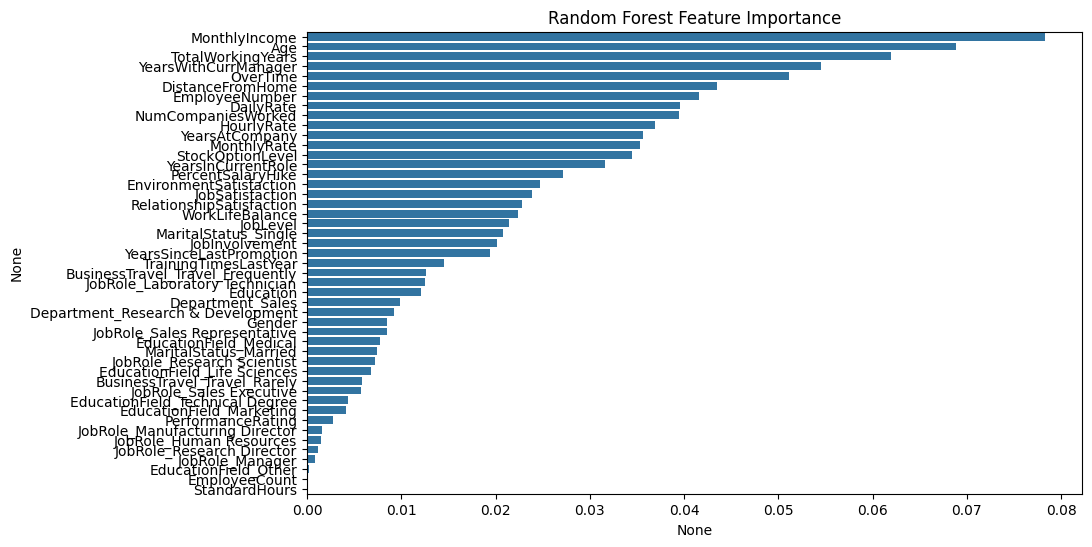

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

feat_imp = pd.Series(best_rf.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Random Forest Feature Importance")
plt.show()

# **INSIGHTS**
**Overtime** → Employees doing overtime are more likely to leave → Reduce workload or reward extra hours.

**JobSatisfaction** → Low satisfaction predicts attrition → Conduct surveys, improve engagement programs.

**MonthlyIncome** → Low salary → Consider salary adjustments or incentives.

**YearsAtCompany** → Employees with fewer years → Targeted retention programs for new hires.